In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import util_michael as util_m
from util import *

In [2]:
ls -l data/

total 1888
-rwxr-xr-x@ 1 cabesd  staff   13380 Jun  5 15:54 data_description.txt*
-rwxr-xr-x@ 1 cabesd  staff   31939 Nov 28  2018 sample_submission.csv*
-rwxr-xr-x@ 1 cabesd  staff  451405 Jun  6 19:04 test.csv*
-rwxr-xr-x@ 1 cabesd  staff  460676 Jun  6 19:04 train.csv*


In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.shape, test.shape

((1460, 81), (1459, 80))

### Combine train and test data for cleaning

In [4]:
comb = pd.concat([train, test], sort=False)
comb = util_m.convert_objects_to_categories(comb)
comb.shape

(2919, 81)

### Check empty values

In [5]:
summary_missing_data(comb)

,# of Missing,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


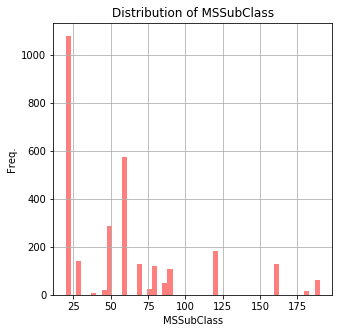

In [6]:
util_m.plot_hist_distribution(comb[['MSSubClass']], 'MSSubClass')

In [7]:
# comb.hist(figsize=(20,20));

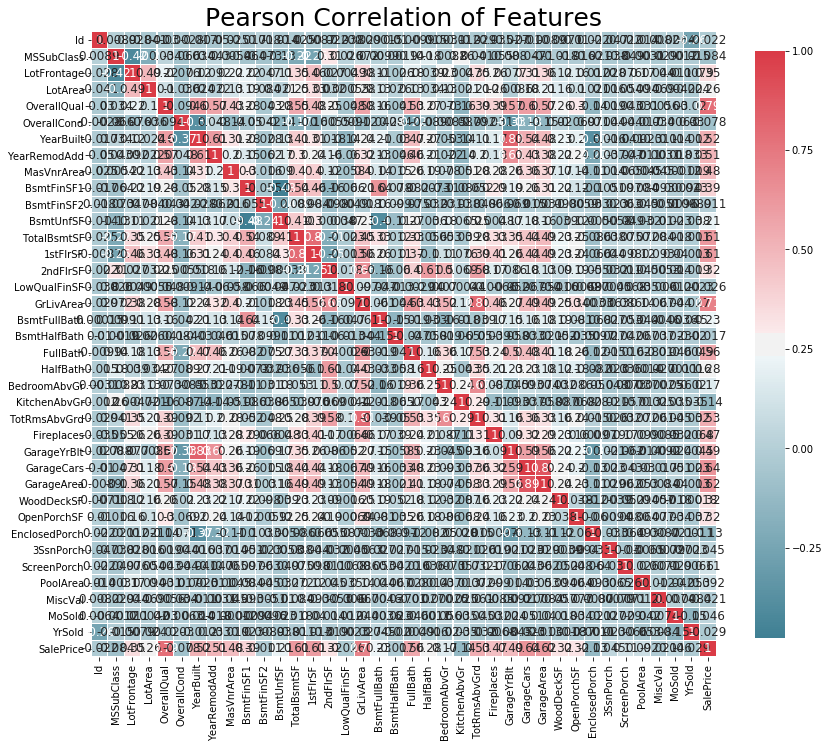

In [8]:
pearson_correlation_heatmap(comb, size=25);

In [53]:
pd.get_dummies(comb).shape

(2919, 290)

In [46]:
pearson_correlation_heatmap(pd.get_dummies(comb), size=50);

Error in callback <function flush_figures at 0x1148689d8> (for post_execute):


KeyboardInterrupt: 

In [47]:
def print_weak_correlations(df: pd.DataFrame, col_to_correlate: str, moderate_value: float = 0.4) -> None:
    """
    Prints out all correlations deemed as moderate (0.4, or set by parameter).
    :param df: pandas DataFrame to look into.
    :param col_to_correlate: String that represents column we want to check correlations with.
    :param moderate_value: Which correlation value we deem as moderate (default 0.4).
    """

    if df[col_to_correlate].dtype.name == 'category':
        df[col_to_correlate] = df[col_to_correlate].cat.codes
    corrs = df[df.columns].corr()
    cols = corrs.columns
    corrs_value = corrs[col_to_correlate]
    for col, corr_value in zip(cols, corrs_value):
        if abs(corr_value) < moderate_value and col != col_to_correlate:
            print(col, ': ', corr_value)

In [54]:
print_weak_correlations(pd.get_dummies(comb), 'SalePrice', 0.1)

Id :  -0.021916719443431112
MSSubClass :  -0.08428413512659523
OverallCond :  -0.0778558940486776
BsmtFinSF2 :  -0.011378121450215216
LowQualFinSF :  -0.02560613000068015
BsmtHalfBath :  -0.016844154297359294
3SsnPorch :  0.04458366533574792
PoolArea :  0.09240354949187278
MiscVal :  -0.02118957964030379
MoSold :  0.04643224522381936
YrSold :  -0.028922585168730426
MSZoning_FV :  0.08994971967036147
MSZoning_RH :  -0.06542929310102559
Street_Grvl :  -0.04103553550004982
Street_Pave :  0.04103553550004989
Alley_Pave :  -0.027655379955633733
LotShape_IR3 :  0.036720475499535554
LandContour_Low :  0.04552825032749539
LandContour_Lvl :  -0.02754457933083911
Utilities_AllPub :  0.014314296147248953
Utilities_NoSeWa :  -0.014314296147248952
LotConfig_Corner :  0.004144823294072492
LotConfig_FR2 :  -0.0068588907827759355
LotConfig_FR3 :  0.018185562475503233
LotConfig_Inside :  -0.08053786914590606
LandSlope_Gtl :  -0.051116149337051664
LandSlope_Mod :  0.042981159944370934
LandSlope_Sev :  0

In [5]:
summary_missing_data(comb)

,# of Missing,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [5]:
summary_missing_data(comb)

,# of Missing,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


In [13]:
comb['HouseStyle'].value_counts()

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

In [26]:
comb[['LandContour', 'LandSlope']].head()

,LandContour,LandSlope
0,Lvl,Gtl
1,Lvl,Gtl
2,Lvl,Gtl
3,Lvl,Gtl
4,Lvl,Gtl


In [28]:
comb[['MSSubClass', 'BldgType']]

,MSSubClass,BldgType
0,60,1Fam
1,20,1Fam
2,60,1Fam
3,70,1Fam
4,60,1Fam
5,50,1Fam
6,20,1Fam
7,60,1Fam
8,50,1Fam
9,190,2fmCon


In [38]:
comb[comb['KitchenAbvGr'] > 1][['KitchenAbvGr','BldgType','MSSubClass']]

,KitchenAbvGr,BldgType,MSSubClass
8,2,1Fam,50
9,2,2fmCon,190
17,2,Duplex,90
39,2,Duplex,90
48,3,2fmCon,190
74,2,1Fam,50
78,2,Duplex,90
93,2,2fmCon,190
102,2,Duplex,90
137,2,Duplex,90


In [42]:
comb['Functional'].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [44]:
comb[comb['FireplaceQu'].isna() ]['Fireplaces']

0       0
5       0
10      0
12      0
15      0
17      0
18      0
19      0
26      0
29      0
30      0
31      0
32      0
36      0
38      0
39      0
42      0
43      0
44      0
47      0
48      0
49      0
50      0
52      0
56      0
57      0
59      0
60      0
61      0
63      0
       ..
1408    0
1411    0
1412    0
1413    0
1414    0
1416    0
1419    0
1426    0
1427    0
1428    0
1429    0
1430    0
1431    0
1432    0
1433    0
1437    0
1438    0
1439    0
1441    0
1444    0
1445    0
1447    0
1448    0
1449    0
1450    0
1452    0
1453    0
1454    0
1455    0
1457    0
Name: Fireplaces, Length: 1420, dtype: int64

In [50]:
comb[['SaleType', 'SaleCondition']]

,SaleType,SaleCondition
0,WD,Normal
1,WD,Normal
2,WD,Normal
3,WD,Abnorml
4,WD,Normal
5,WD,Normal
6,WD,Normal
7,WD,Normal
8,WD,Abnorml
9,WD,Normal
